## Apriori Vs FP Gowth

### Dataset Used - https://github.com/aryan-jadon/Apriori-and-FPGrowth-Assignment/blob/main/Dataset/store_data.csv

#### Market Basket
The market basket is a list of some fixed items that are used to track the inflation and overall price movements of a specific market in an economy. In other words, it is a basket that contains a set of standard goods or services that people commonly buys.



#### Assosciation Rules
Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

Assosciation rules are produced using algorithms like :

1. Apriori Algorithm
2. FP-growth Algorithm

A rule can be defined as an implication, X⟶Y where X and Y are subsets of I(X,Y⊆I), and they have no element in common. X and Y are the antecedent and the consequent of the rule, respectively.

Eg: {Bread,Egg}=> {Milk} ItemSet={Bread,Egg,Milk}

There are various metrics in place to help us understand the strength of assosciation between antecedent and consequent:

1. Support
2. Confidence
3. Lift or Correlation or interest
4. Leverage
5. Conviction


In [1]:
! pip install squarify
! pip install mlxtend --upgrade

In [2]:
''' importing libraries '''
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import squarify
import matplotlib


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules,apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Checking Dataset

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/aryan-jadon/Apriori-and-FPGrowth-Assignment/main/Dataset/store_data.csv")

In [4]:
dataset.shape

(7500, 20)

In [5]:
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Transformation

In [6]:
''' converting into required format of TransactionEncoder()'''

trans=[]

for i in range(len(dataset)):
    trans.append([str(dataset.values[i,j]) for j in range(0,20)])

trans=np.array(trans)

print(trans.shape)

' converting into required format of TransactionEncoder()'

(7500, 20)


In [7]:
''' Using TransactionEncoder '''

te=TransactionEncoder()
dataset=te.fit_transform(trans)
dataset=pd.DataFrame(dataset,
                     columns=te.columns_,
                     dtype=int)

dataset.shape

' Using TransactionEncoder '

(7500, 121)

In [8]:
''' here we also find nan as one of the columns so lets drop that column '''

dataset.drop('nan',axis=1,inplace=True)

' here we also find nan as one of the columns so lets drop that column '

### Data Visualizations

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'mineral water'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'spaghetti'),
 Text(0, 0, 'french fries'),
 Text(0, 0, 'chocolate'),
 Text(0, 0, 'green tea'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'ground beef'),
 Text(0, 0, 'frozen vegetables'),
 Text(0, 0, 'pancakes'),
 Text(0, 0, 'burgers'),
 Text(0, 0, 'cake'),
 Text(0, 0, 'cookies'),
 Text(0, 0, 'escalope'),
 Text(0, 0, 'low fat yogurt'),
 Text(0, 0, 'shrimp'),
 Text(0, 0, 'tomatoes'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'frozen smoothie'),
 Text(0, 0, 'turkey')]

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Tree map of top 20 items')

(0.0, 100.0, 0.0, 100.0)

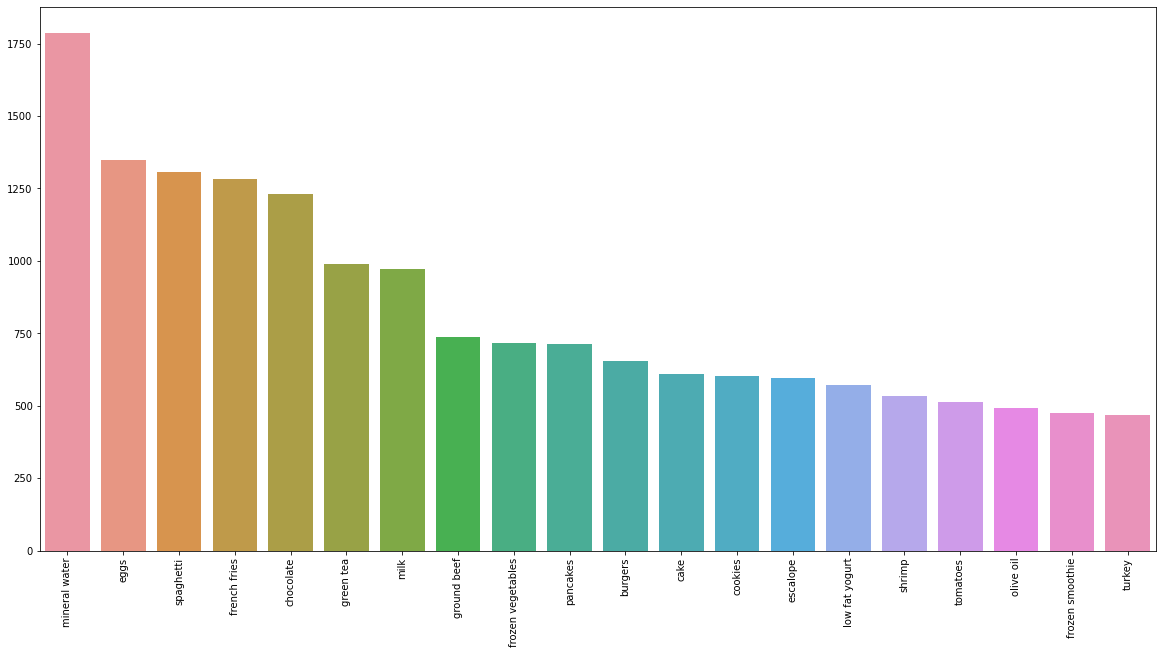

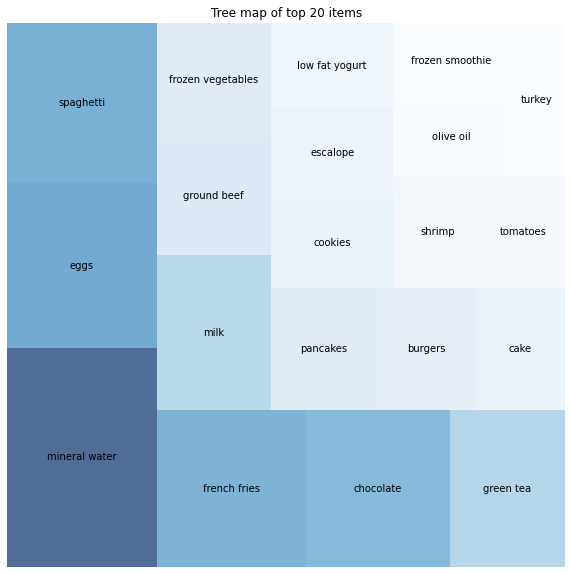

In [9]:
# Lets consider the top 20 items purchased freequently
r=dataset.sum(axis=0).sort_values(ascending=False)[:20]

# Altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

# create a color palette, mapped to these values
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

## Apriori

In [10]:
# let us return items and ietmsets with atleast 5% support:
freq_items=apriori(dataset,min_support=0.05,use_colnames=True)
freq_items

,support,itemsets
0,0.087200,(burgers)
1,0.081067,(cake)
2,0.060000,(chicken)
3,0.163867,(chocolate)
4,0.080400,(cookies)
5,0.051067,(cooking oil)
6,0.179733,(eggs)
7,0.079333,(escalope)
8,0.170933,(french fries)
9,0.063200,(frozen smoothie)


In [11]:
# Now let's generate association rules

res=association_rules(freq_items,metric="lift",min_threshold=1.3)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398
2,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468
3,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184


There is more chance of the transaction {spaghetti,mineral water} than {chocolate,mineral water} as we can find the interesting nature of rule by comparing lift,leverage and conviction of {spaghetti,mineral water} and {chocolate,mineral water}.

### Selecting and Filtering the Results

In [12]:
frequent_itemsets = apriori(dataset, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


# getting the item sets with length = 2 and support more han 10%

frequent_itemsets[(frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]




,support,itemsets,length
25,0.052667,"(chocolate, mineral water)",2
26,0.050933,"(eggs, mineral water)",2
27,0.059733,"(spaghetti, mineral water)",2


In [13]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.087200,(burgers),1
1,0.081067,(cake),1
2,0.060000,(chicken),1
3,0.163867,(chocolate),1
4,0.080400,(cookies),1
5,0.051067,(cooking oil),1
6,0.179733,(eggs),1
7,0.079333,(escalope),1
8,0.170933,(french fries),1
9,0.063200,(frozen smoothie),1


### Shortcomings Of Apriori Algorithm

1. Using Apriori needs a generation of candidate itemsets. These itemsets may be large in number if the itemset in the database is huge.

2. Apriori needs multiple scans of the database to check the support of each itemset generated and this leads to high costs. These shortcomings can be overcome using the FP growth algorithm.

### FP-Growth

A frequent pattern is generated without the need for candidate generation. FP growth algorithm represents the database in the form of a tree called a frequent pattern tree or FP tree.

This tree structure will maintain the association between the itemsets. The database is fragmented using one frequent item. This fragmented part is called “pattern fragment”. The itemsets of these fragmented patterns are analyzed. Thus with this method, the search for frequent itemsets is reduced comparatively.

FP TREE
Frequent Pattern Tree is a tree-like structure that is made with the initial itemsets of the database. The purpose of the FP tree is to mine the most frequent pattern. Each node of the FP tree represents an item of the itemset.

The root node represents null while the lower nodes represent the itemsets. The association of the nodes with the lower nodes that is the itemsets with the other itemsets are maintained while forming the tree.



In [15]:
#running the fpgrowth algorithm
res=fpgrowth(dataset,min_support=0.05,use_colnames=True)
res

,support,itemsets
0,0.179733,(eggs)
1,0.087200,(burgers)
2,0.062533,(turkey)
3,0.238267,(mineral water)
4,0.132000,(green tea)
5,0.129600,(milk)
6,0.058533,(whole wheat rice)
7,0.076400,(low fat yogurt)
8,0.170933,(french fries)
9,0.050533,(soup)


In [16]:
res=association_rules(res,metric="lift",min_threshold=1)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957
1,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286
2,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468
3,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184
4,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506
5,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398


## Conclusion

Apriori Algorithm :

1. It is a classic algorithm for learning association rules.
2. It uses a bottom up approach where frequent subsets are extended one at a time.
3. It uses Breadth first search and hash tree structure to count candidate item sets efficiently.

FP Growth:

1. It allows frequent item set discovery without candidate generation.
2. It builds a compact data structure called FP tree with two passes over thedatabase.
3. It extracts frequent item sets directly from the FP tree and traverses through the FP tree.
